# Project 2: Runge-Kutta Fehlberg for ODE
insert header comment (2c) here

## Part 1 - Solve using RKF

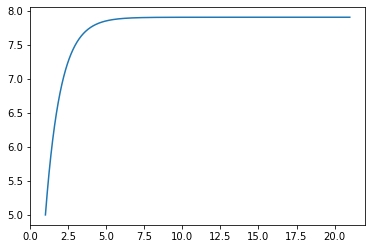

In [1]:
# import necessary packages
import numpy as np  # import numpy under the name np
from scipy.integrate import odeint  # import the odeint function from scipy integrate package
import matplotlib.pyplot as plt  # import matplotlib pyplot package under the name plt

# define initial conditionals
x0 = 1
y0 = 5

# define step size
h = 0.02

# initialize lists for values of x and y
x = []
y = []

# insert each initial conditional into its respective list
x.append(x0)
y.append(y0)

# define ODE to solve
def func(xi, yi):
    # return value of y'
    return yi / (np.exp(xi) - 1)

# define range of n for the solutions (xn, yn) of the ODE
myRange = range(0, 1000)  # program will use RKF method to calculate solutions (x0, y0) to (x1000, y1000)

for n in myRange:
    # first, calculate k1, k2, k3, k4
    k1 = func(x[n], y[n])
    k2 = func(x[n] + h/2, y[n] + h/2 * k1)
    k3 = func(x[n] + h/2, y[n] + h/2 * k2)
    k4 = func(x[n] + h, y[n] + h * k3)

    # next, apply k values to recurrence formula
    x.append(x[n] + h)
    y.append(y[n] + (h/6)*(k1 + 2*k2 + 2*k3 + k4))

# plot the results
plt.plot(x, y)
plt.show()


## Part 2 - Solve using ODEINT

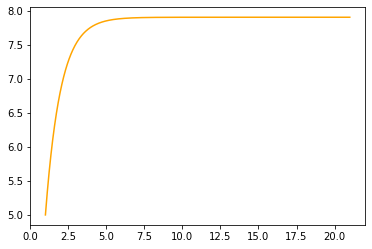

In [2]:
# define function to calculate given derivative
def model(yi, xi):
    return yi / (np.exp(xi) - 1)

# create array for x values to report solution at
xr = np.linspace(1, 21, 1000)
yinit = 5.0

ys = odeint(model, yinit, xr)

plt.plot(xr, ys, 'orange')
plt.show()

## Plotting solutions of both methods together

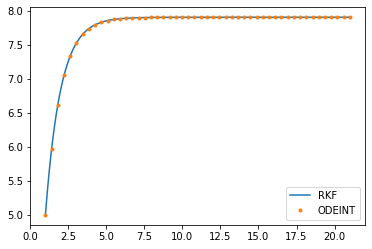

In [3]:
xr = np.linspace(1, 21, 50)

ys = odeint(model, yinit, xr)

plt.plot(x, y, label = "RKF")
plt.plot(xr, ys, '.', label = "ODEINT")
plt.legend()
plt.show()

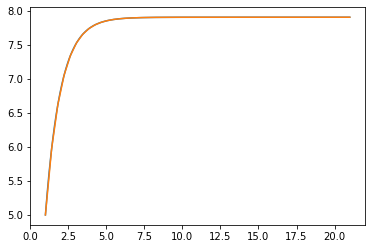

In [4]:
plt.plot(x, y)
plt.plot(xr, ys)